In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('tab10')

In [198]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [199]:
#clearn database

In [200]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|age|deck|
|isnull.sum()|2|177|688|

In [201]:
titanic.embark_town= titanic.embark_town.fillna('Unknown') 

In [202]:
titanic['deck']= titanic['deck'].cat.add_categories('Unknown')

In [203]:
titanic['deck']= titanic['deck'].fillna('Unknown') 

In [204]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

In [205]:
titanic['age'] = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [206]:
titanic['age'].isnull().sum()

11

In [207]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']
#fillna one more time wiwth same sibsp and parchh

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [208]:
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
159,0,3,male,NaN,8,2,69.55,S,Third,man,True,Unknown,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,Unknown,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,S,Third,man,True,Unknown,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,S,Third,man,True,Unknown,Southampton,no,False
792,0,3,female,NaN,8,2,69.55,S,Third,woman,False,Unknown,Southampton,no,False
846,0,3,male,NaN,8,2,69.55,S,Third,man,True,Unknown,Southampton,no,False
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,Unknown,Southampton,no,False


In [209]:
child_age = titanic[titanic['who'] == 'child']['age'].mean()

In [210]:
titanic.age = titanic.age.fillna(child_age)

In [211]:
# Feature expection 

<AxesSubplot:xlabel='age', ylabel='Count'>

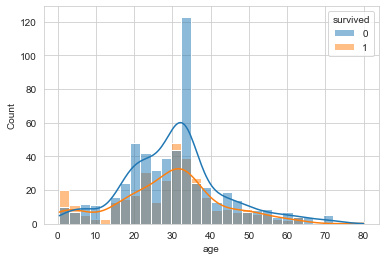

In [212]:
sns.histplot(data = titanic, x= 'age', kde = True, hue = 'survived')

In [213]:
titanic.age.describe() #why because we take mean of them before

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [214]:
age_groups = [0,15,25,45,60,70,100] #0-15 trẻ em, 15-25 teenager...
pd.cut(titanic['age'], bins= age_groups)
titanic['age_groups'] = pd.cut(titanic['age'], bins= age_groups) # Học lại bài phân nhóm
#0 and 100 is lowerboad and uperbound

In [215]:
# titanic.drop('age_groups', axis = 1)

In [216]:
titanic['age_groups']

0      (15, 25]
1      (25, 45]
2      (25, 45]
3      (25, 45]
4      (25, 45]
         ...   
886    (25, 45]
887    (15, 25]
888    (25, 45]
889    (25, 45]
890    (25, 45]
Name: age_groups, Length: 891, dtype: category
Categories (6, interval[int64, right]): [(0, 15] < (15, 25] < (25, 45] < (45, 60] < (60, 70] < (70, 100]]

In [217]:
#one-hot encoding separtion data ->number data 

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

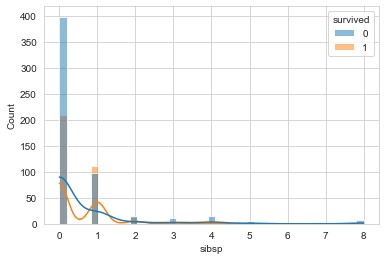

In [218]:
sns.histplot(data = titanic, x= 'sibsp', kde = True, hue = 'survived')

<AxesSubplot:xlabel='parch', ylabel='Count'>

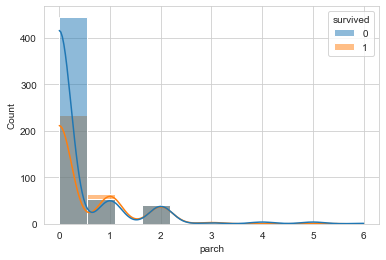

In [219]:
sns.histplot(data = titanic, x= 'parch', kde = True, hue = 'survived')

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

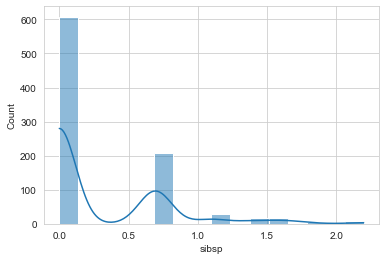

In [220]:
sns.histplot(np.log1p(titanic['sibsp']), kde = True)

In [221]:
#Do giá trị discrease quá ít nên lấy log quá ít nên save as defaults

<AxesSubplot:xlabel='parch', ylabel='Count'>

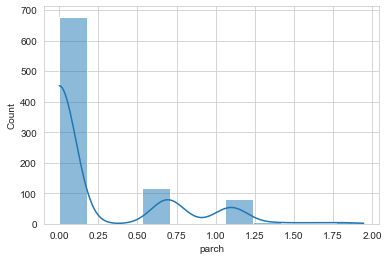

In [222]:
sns.histplot(np.log1p(titanic['parch']), kde = True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

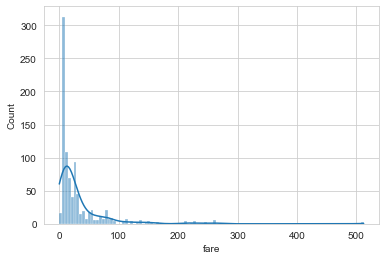

In [223]:
sns.histplot(titanic['fare'], kde = True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

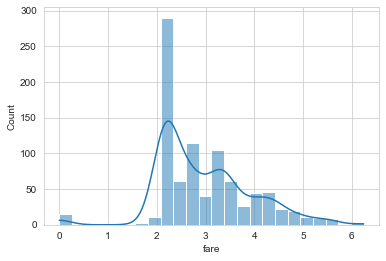

In [224]:
sns.histplot(np.log1p(titanic['fare']), kde = True)

In [225]:
titanic['log_fare']=np.log1p(titanic['fare'])

In [226]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,log_fare
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,"(15, 25]",2.110213
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(25, 45]",4.280593
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,"(25, 45]",2.188856
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 45]",3.990834
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,"(25, 45]",2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True,"(25, 45]",2.639057
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]",3.433987
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False,"(25, 45]",3.196630
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 45]",3.433987


In [227]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_groups   891 non-null    category
 16  log_fare     891 non-null    float64 
dtypes: bool(2), category(3), float64(3), int64(4), object(5)
memory usage: 88

![]('Note1.png')

In [228]:
# One-hot encoding

In [229]:
# xử lý dữ liệu phân loại và dữ liệu text nếu có 

In [230]:
#sex, adult_male and alone

In [231]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [232]:
titanic.loc[(titanic.sex == 'male'),'sex']= 0
titanic.loc[(titanic.sex == 'female'),'sex']= 1

In [233]:
titanic.sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: object

In [234]:
titanic['gender'] = titanic.sex
#titanic.map({'male':0,'female':1})

In [235]:
titanic['adult_male'] = titanic['adult_male'].astype(int)#True =1 False =0
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_groups   891 non-null    category
 16  log_fare     891 non-null    float64 
 17  gender       891 non-null    object  
dtypes: bool(1), category(3), float

In [236]:
titanic['alone'] = titanic['alone'].astype(int)#True =1 False =0

In [237]:
#Facetgrid

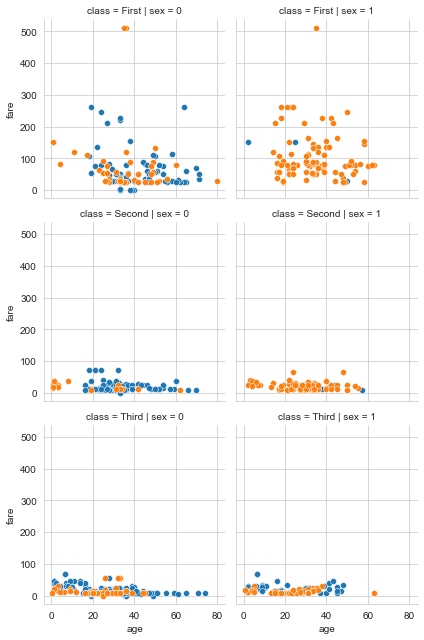

In [238]:
import seaborn as sns
facet_grid = sns.FacetGrid(data=titanic, row='class', col='sex', hue='survived')
facet_grid.map(sns.scatterplot, 'age', 'fare')

In [239]:
filter1 = titanic['class'].str.lower().isin(['First','Second'])
filter2 = titanic['gender'] == 1

In [107]:
titanic['female_class']=(filter1 & filter2).astype(int)

In [108]:
titanic.to_csv('preprocessing.csv')

In [110]:
#Technics of one-hot incoding 
# a b c
# 1 0 0 (A)
# 0 1 0 (B)
# 0 0 1 (C)

In [155]:
encoded = pd.get_dummies(titanic[['deck','embarked','who','class','age_groups']])
#technics nay tao them du lieu moi

In [156]:
titanic = titanic.join(encoded)

ValueError: columns overlap but no suffix specified: Index(['deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'deck_Unknown', 'embarked_C', 'embarked_Q', 'embarked_S', 'who_child',
       'who_man', 'who_woman', 'class_First', 'class_Second', 'class_Third',
       'age_groups_(0, 15]', 'age_groups_(15, 25]', 'age_groups_(25, 45]',
       'age_groups_(45, 60]', 'age_groups_(60, 70]', 'age_groups_(70, 100]'],
      dtype='object')

In [128]:
titanic.to_csv('preprocessing2.csv')

In [158]:
titanic = titanic.drop(columns = ['deck','embarked','who','class','age_groups','embark_town', 'sex','fare', 'alive','binary_sex','embarked'])

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [160]:
X, y = titanic.drop(columns = 'survived'), titanic['survived']

In [161]:
x_train, y_train, x_test, y_test = train_test_split(X,y,test_size=0.25, random_state = 90)
display(x_train, y_train, x_test, y_test)

,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,deck_A,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
415,3,31.084211,0,0,0,1,2.202765,1,0,0,...,1,0,0,1,0,0,1,0,0,0
652,3,21.000000,0,0,1,1,2.244246,0,0,0,...,0,0,0,1,0,1,0,0,0,0
204,3,18.000000,0,0,1,1,2.202765,0,0,0,...,0,0,0,1,0,1,0,0,0,0
32,3,31.084211,0,0,0,1,2.169054,1,0,0,...,1,0,0,1,0,0,1,0,0,0
860,3,41.000000,2,0,1,0,2.715244,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2,22.000000,1,1,0,0,3.401197,1,0,0,...,1,0,1,0,0,1,0,0,0,0
671,1,31.000000,1,0,1,0,3.970292,0,0,0,...,0,1,0,0,0,0,1,0,0,0
626,2,57.000000,0,0,1,1,2.591516,0,0,0,...,0,0,1,0,0,0,0,1,0,0
669,1,33.355556,1,0,0,0,3.970292,1,0,0,...,1,1,0,0,0,0,1,0,0,0


,pclass,age,sibsp,parch,adult_male,alone,log_fare,gender,female_class,deck_A,...,who_woman,class_First,class_Second,class_Third,"age_groups_(0, 15]","age_groups_(15, 25]","age_groups_(25, 45]","age_groups_(45, 60]","age_groups_(60, 70]","age_groups_(70, 100]"
60,3,22.000000,0,0,1,1,2.107689,0,0,0,...,0,0,0,1,0,1,0,0,0,0
100,3,28.000000,0,0,0,1,2.185579,1,0,0,...,1,0,0,1,0,0,1,0,0,0
231,3,29.000000,0,0,1,1,2.171907,0,0,0,...,0,0,0,1,0,0,1,0,0,0
488,3,30.000000,0,0,1,1,2.202765,0,0,0,...,0,0,0,1,0,0,1,0,0,0
221,2,27.000000,0,0,1,1,2.639057,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2,31.000000,0,0,1,1,2.639057,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300,3,31.084211,0,0,0,1,2.169054,1,0,0,...,1,0,0,1,0,0,1,0,0,0
162,3,26.000000,0,0,1,1,2.171907,0,0,0,...,0,0,0,1,0,0,1,0,0,0
310,1,24.000000,0,0,0,1,4.432700,1,0,0,...,1,1,0,0,0,1,0,0,0,0


415    0
652    0
204    1
32     1
860    0
      ..
323    1
671    0
626    0
669    1
859    0
Name: survived, Length: 668, dtype: int64

60     0
100    0
231    0
488    0
221    0
      ..
673    1
300    1
162    0
310    1
525    0
Name: survived, Length: 223, dtype: int64

In [162]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

ValueError: Unknown label type: 'unknown'

In [186]:
n_feature = len(x_train.columns)

In [187]:
np.log2(n_feature)
n_feature/2

16.0

In [188]:
tree= DecisionTreeClassifier(
    max_depth =round(np.log2(n_feature)),
    max_features= round(n_feature/2)
)
tree.fit(x_train,y_train)

ValueError: Unknown label type: 'unknown'

In [189]:
!pip install keras

In [190]:
import keras

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (/opt/anaconda3/envs/anthony/lib/python3.7/site-packages/tensorflow/python/eager/context.py)

In [192]:
n_features = 16
model = keras.Sequential()
input_layer = keras.layers.InputLayer(n_features)
dense_layer1 = keras.layers.Dense(int(n_features/2), activation='relu')
dense_layer2 = keras.layers.Dense(int(np.sqrt(n_features), activation='relu')
output_layer = keras.layers.Dense(1, activation='sigmoid')                            
model.add(input_layer)
model.add(dense_layer1)
model.add(dense_layer2)
model.add(output_layer)

SyntaxError: invalid syntax (<ipython-input-192-2a523b0843d7>, line 6)

In [193]:
model.complie(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)
model.fit(x_train, y_train, batch_size=150, epochs=90)

AttributeError: 'Sequential' object has no attribute 'complie'

In [194]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
    max_depth =round(np.log2(n_feature)),
    max_features= round(n_feature/2)
)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [668, 223]

In [196]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#tTunning on Tensorflow 
# Thay đổi hàm actiavtion 
#tahy đổi headdenlayer
#Viet lop để thử

In [240]:
#Muốn phát triển toán cao cấp 
#Sác xuất thống kê 